In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt

In [2]:
# fdf = pd.read_csv("D:\DATA_Science\DATASET\WEEK05_AdvancedAnalytics\data_member.csv", index_col=0) # for Windows
fdf = pd.read_csv('~/Documents/DATAScience/TempBeforeGit/member and transaction data/data member.csv', index_col=0) # for MacOS

fdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590565 entries, 0 to 590564
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ent              590565 non-null  object
 1   original_status  590565 non-null  object
 2   join_month       590565 non-null  int64 
 3   join_year        590565 non-null  int64 
 4   sponsor          590565 non-null  object
dtypes: int64(2), object(3)
memory usage: 27.0+ MB


In [3]:
## FOR Windows
# t21_df = pd.read_csv("D:\DATA_Science\DATASET\WEEK05_AdvancedAnalytics\\new_transaction 2021.csv", index_col=0)
# t22_df = pd.read_csv("D:\DATA_Science\DATASET\WEEK05_AdvancedAnalytics\\new_transaction 2022.csv", index_col=0)
# t23_df = pd.read_csv("D:\DATA_Science\DATASET\WEEK05_AdvancedAnalytics\\new_transaction 2023.csv", index_col=0)

## FOR Mac
t21_df = pd.read_csv('~/Documents/DATAScience/TempBeforeGit/member and transaction data/new_transaction 2021.csv', index_col=0)
t22_df = pd.read_csv('~/Documents/DATAScience/TempBeforeGit/member and transaction data/new_transaction 2022.csv', index_col=0)
t23_df = pd.read_csv('~/Documents/DATAScience/TempBeforeGit/member and transaction data/new_transaction 2023.csv', index_col=0)

tall_df = pd.concat([t21_df,t22_df,t23_df])
tall_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4129114 entries, 0 to 643128
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   payment_date       object 
 1   ent                object 
 2   center             object 
 3   total_amount       float64
 4   discount           float64
 5   paid_amount        int64  
 6   trans_origin_type  object 
 7   product            object 
 8   qty                int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 315.0+ MB


In [4]:
## for Windows

# ff = pd.read_csv('D:\DATA_Science\DATASET\WEEK05_AdvancedAnalytics\\transaction 2021.csv', index_col=0)
# ff1 = pd.read_csv('D:\DATA_Science\DATASET\WEEK05_AdvancedAnalytics\\transaction 2022.csv', index_col=0)
# ff2 = pd.read_csv('D:\DATA_Science\DATASET\WEEK05_AdvancedAnalytics\\transaction 2023.csv', index_col=0)

## for MacOS

ff = pd.read_csv('~/Documents/DATAScience/TempBeforeGit/member and transaction data/transaction 2021.csv', index_col=0)
ff1 = pd.read_csv('~/Documents/DATAScience/TempBeforeGit/member and transaction data/transaction 2022.csv', index_col=0)
ff2 = pd.read_csv('~/Documents/DATAScience/TempBeforeGit/member and transaction data/transaction 2023.csv', index_col=0)

o_df = pd.concat([ff,ff1,ff2])
o_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2406316 entries, 0 to 362108
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   payment_date       object 
 1   ent                object 
 2   center             object 
 3   product_json       object 
 4   total_amount       float64
 5   discount           float64
 6   paid_amount        int64  
 7   trans_origin_type  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 165.2+ MB


# STEP 1
- Clean DATA

In [5]:
fdf['join'] = pd.to_datetime(fdf['join_year'].astype(str) + '/' + fdf['join_month'].astype(str) + '/01')
fdf = fdf.loc[:,['ent','original_status','sponsor','join']]
fdf['mem_duration(months)'] = round((dt.datetime(2023, 7, 1)-fdf['join'])/np.timedelta64(1, 'M'))

fdf

,ent,original_status,sponsor,join,mem_duration(months)
0,UCC4CC4F,-,8844CQCEY,2014-05-01,110.0
1,UCC4CCEK,-,8844CQCCU,2014-05-01,110.0
2,UCC4CC15,-,8844CQCEY,2014-05-01,110.0
3,UCC4CCR2,-,8844CQCEY,2014-05-01,110.0
4,UCC4CCJP,-,8844CQCEY,2014-05-01,110.0
...,...,...,...,...,...
590560,H3CCC43B,A,H3CCC4R2,2010-07-01,156.0
590561,H3CCC4ZY,A,H3CCC4JP,2010-06-01,157.0
590562,H3CCCEC7,A,H3CCC4JP,2010-07-01,156.0
590563,H3CCCE4I,A,H3CCC4JP,2010-07-01,156.0


In [6]:
# Change Date format
tall_df['payment_date'] = pd.to_datetime(tall_df['payment_date'], format='%Y-%m-%d %H:%M:%S')
tall_df['payment_date'] = pd.to_datetime( tall_df['payment_date'].dt.to_period('M').astype(str) )

o_df['payment_date'] = pd.to_datetime(o_df['payment_date'], format='%Y-%m-%d %H:%M:%S')
o_df['payment_date'] = pd.to_datetime( o_df['payment_date'].dt.to_period('M').astype(str) )

tall_df

,payment_date,ent,center,total_amount,discount,paid_amount,trans_origin_type,product,qty
0,2021-01-01,TCC43RQQZ3B,TKC4CJ,1627000.0,0.0,0,online,1ECZ,1
1,2021-01-01,TCC43RQQZ3B,TKC4CJ,1627000.0,0.0,0,online,8CEC4Q,1
2,2021-01-01,TCC4Q4JZ4Q0,TKCEWQ,594000.0,0.0,0,online,4E4W,2
3,2021-01-01,TCC4Q4JZ4Q0,TKCEWQ,594000.0,0.0,0,online,DC4CC4,1
4,2021-01-01,TCC4RJ11QE7,TKC14E,468000.0,0.0,0,online,IC4CC4,1
...,...,...,...,...,...,...,...,...,...
643124,2023-07-01,TCCEREZCC10,TKC1Z4,2500.0,NaN,2500,offline,KCQCEJ,1
643125,2023-07-01,TCCEQ1RJ3JY,TKC1Z4,2500.0,NaN,2500,offline,KCQCEJ,1
643126,2023-07-01,TCCEQ4Z4R4Y,TKC1Z4,2500.0,NaN,2500,offline,KCQCEJ,1
643127,2023-07-01,TCCEQEZJQ4F,TKC1Z4,2500.0,NaN,2500,offline,KCQCER,1


- Transform

In [7]:
def TransformCol(fdf,o_df,tall_df,yyear):
    
    o_df = o_df.loc[(o_df['payment_date'] >= dt.datetime(yyear, 1, 1)) & (o_df['payment_date'] <= dt.datetime(yyear, 12, 1))]
    o_df_q1 = o_df.loc[(o_df['payment_date'] >= dt.datetime(yyear, 1, 1)) & (o_df['payment_date'] < dt.datetime(yyear, 4, 1))]
    o_df_q2 = o_df.loc[(o_df['payment_date'] >= dt.datetime(yyear, 4, 1)) & (o_df['payment_date'] < dt.datetime(yyear, 7, 1))]
    o_df_q3 = o_df.loc[(o_df['payment_date'] >= dt.datetime(yyear, 7, 1)) & (o_df['payment_date'] < dt.datetime(yyear, 10, 1))]
    o_df_q4 = o_df.loc[(o_df['payment_date'] >= dt.datetime(yyear, 10, 1)) & (o_df['payment_date'] <= dt.datetime(yyear, 12, 1))]

    allprod = len(tall_df['product'].unique())
    tall_df = tall_df.loc[(tall_df['payment_date'] >= dt.datetime(yyear, 1, 1)) & (tall_df['payment_date'] <= dt.datetime(yyear, 12, 1))]
    tall_df_q1 = tall_df.loc[(tall_df['payment_date'] >= dt.datetime(yyear, 1, 1)) & (tall_df['payment_date'] < dt.datetime(yyear, 4, 1))]
    tall_df_q2 = tall_df.loc[(tall_df['payment_date'] >= dt.datetime(yyear, 4, 1)) & (tall_df['payment_date'] < dt.datetime(yyear, 7, 1))]
    tall_df_q3 = tall_df.loc[(tall_df['payment_date'] >= dt.datetime(yyear, 7, 1)) & (tall_df['payment_date'] < dt.datetime(yyear, 10, 1))]
    tall_df_q4 = tall_df.loc[(tall_df['payment_date'] >= dt.datetime(yyear, 10, 1)) & (tall_df['payment_date'] <= dt.datetime(yyear, 12, 1))]

    # Total Spending

    j0 = pd.DataFrame(o_df.groupby(by=['ent'])['total_amount'].apply(lambda x: x.sum()))
    j1 = pd.DataFrame(o_df_q1.groupby(by=['ent'], group_keys=True)['total_amount'].apply(lambda x: x.sum())
                                    ).rename(columns={'total_amount':'total_Q1'})                       
    j2 = pd.DataFrame(o_df_q2.groupby(by=['ent'], group_keys=True)['total_amount'].apply(lambda x: x.sum())
                                    ).rename(columns={'total_amount':'total_Q2'}) 
    j3 = pd.DataFrame(o_df_q3.groupby(by=['ent'], group_keys=True)['total_amount'].apply(lambda x: x.sum())
                                    ).rename(columns={'total_amount':'total_Q3'}) 
    j4 = pd.DataFrame(o_df_q4.groupby(by=['ent'], group_keys=True)['total_amount'].apply(lambda x: x.sum())
                                    ).rename(columns={'total_amount':'total_Q4'}) 

    # Total Spending Online

    j5 = pd.DataFrame(o_df.loc[o_df['trans_origin_type']=='online'
                                ].groupby(by=['ent'], group_keys=True)['total_amount'].apply(lambda x: x.sum())
                                ).rename(columns={'total_amount':'total_online'})
    j6 = pd.DataFrame(o_df_q1.loc[o_df_q1['trans_origin_type']=='online'
                                ].groupby(by=['ent'], group_keys=True)['total_amount'].apply(lambda x: x.sum())
                                ).rename(columns={'total_amount':'total_online_Q1'})                       
    j7 = pd.DataFrame(o_df_q2.loc[o_df_q2['trans_origin_type']=='online'
                                ].groupby(by=['ent'], group_keys=True)['total_amount'].apply(lambda x: x.sum())
                                ).rename(columns={'total_amount':'total_online_Q2'})    
    j8 = pd.DataFrame(o_df_q3.loc[o_df_q3['trans_origin_type']=='online'
                                ].groupby(by=['ent'], group_keys=True)['total_amount'].apply(lambda x: x.sum())
                                ).rename(columns={'total_amount':'total_online_Q3'})    
    j9 = pd.DataFrame(o_df_q4.loc[o_df_q4['trans_origin_type']=='online'
                                ].groupby(by=['ent'], group_keys=True)['total_amount'].apply(lambda x: x.sum())
                                ).rename(columns={'total_amount':'total_online_Q4'})    

    # Total Spending Offline

    j10 = pd.DataFrame(o_df.loc[o_df['trans_origin_type']=='offline'
                                ].groupby(by=['ent'], group_keys=True)['total_amount'].apply(lambda x: x.sum())
                                ).rename(columns={'total_amount':'total_offline'})
    j11 = pd.DataFrame(o_df_q1.loc[o_df_q1['trans_origin_type']=='offline'
                                ].groupby(by=['ent'], group_keys=True)['total_amount'].apply(lambda x: x.sum())
                                ).rename(columns={'total_amount':'total_offline_Q1'})                       
    j12 = pd.DataFrame(o_df_q2.loc[o_df_q2['trans_origin_type']=='offline'
                                ].groupby(by=['ent'], group_keys=True)['total_amount'].apply(lambda x: x.sum())
                                ).rename(columns={'total_amount':'total_offline_Q2'})    
    j13 = pd.DataFrame(o_df_q3.loc[o_df_q3['trans_origin_type']=='offline'
                                ].groupby(by=['ent'], group_keys=True)['total_amount'].apply(lambda x: x.sum())
                                ).rename(columns={'total_amount':'total_offline_Q3'})    
    j14 = pd.DataFrame(o_df_q4.loc[o_df_q4['trans_origin_type']=='offline'
                                ].groupby(by=['ent'], group_keys=True)['total_amount'].apply(lambda x: x.sum())
                                ).rename(columns={'total_amount':'total_offline_Q4'})

    # Total Network

    j15 = pd.DataFrame(fdf.groupby(by=['sponsor'], group_keys=True)['ent'].apply(lambda x: x.count())
                    ).rename(columns={'ent':'total_network'})
    j16 = pd.merge(o_df_q1['ent'], fdf.loc[:,['ent','sponsor']], how='left', left_on=['ent'], right_on=['ent'])
    j16 = pd.DataFrame(j16.groupby(by=['sponsor'], group_keys=True)['ent'].apply(lambda x: x.count())
                    ).rename(columns={'ent':'network_Q1'})
    j17 = pd.merge(o_df_q2['ent'], fdf.loc[:,['ent','sponsor']], how='left', left_on=['ent'], right_on=['ent'])
    j17 = pd.DataFrame(j17.groupby(by=['sponsor'], group_keys=True)['ent'].apply(lambda x: x.count())
                    ).rename(columns={'ent':'network_Q2'})
    j18 = pd.merge(o_df_q3['ent'], fdf.loc[:,['ent','sponsor']], how='left', left_on=['ent'], right_on=['ent'])
    j18 = pd.DataFrame(j18.groupby(by=['sponsor'], group_keys=True)['ent'].apply(lambda x: x.count())
                    ).rename(columns={'ent':'network_Q3'})
    j19 = pd.merge(o_df_q4['ent'], fdf.loc[:,['ent','sponsor']], how='left', left_on=['ent'], right_on=['ent'])
    j19 = pd.DataFrame(j19.groupby(by=['sponsor'], group_keys=True)['ent'].apply(lambda x: x.count())
                    ).rename(columns={'ent':'network_Q4'})

    # Total Transaction

    j20 = pd.DataFrame(o_df.groupby(by=['ent'], group_keys=True)['payment_date'].apply(lambda x: x.count())
                    ).rename(columns={'payment_date':'total_transaction'})
    j21 = pd.DataFrame(o_df_q1.groupby(by=['ent'], group_keys=True)['payment_date'].apply(lambda x: x.count())
                        ).rename(columns={'payment_date':'transaction_Q1'})
    j22 = pd.DataFrame(o_df_q2.groupby(by=['ent'], group_keys=True)['payment_date'].apply(lambda x: x.count())
                        ).rename(columns={'payment_date':'transaction_Q2'})
    j23 = pd.DataFrame(o_df_q3.groupby(by=['ent'], group_keys=True)['payment_date'].apply(lambda x: x.count())
                        ).rename(columns={'payment_date':'transaction_Q3'})
    j24 = pd.DataFrame(o_df_q4.groupby(by=['ent'], group_keys=True)['payment_date'].apply(lambda x: x.count())
                        ).rename(columns={'payment_date':'transaction_Q4'})

    # Total quantity

    j25 = pd.DataFrame(tall_df.groupby(by=['ent'])['qty'].apply(lambda x: x.sum())).rename(columns={'qty':'total_qty'})
    j26 = pd.DataFrame(tall_df_q1.groupby(by=['ent'], group_keys=True)['qty'].apply(lambda x: x.sum())
                                ).rename(columns={'qty':'qty_Q1'})
    j27 = pd.DataFrame(tall_df_q2.groupby(by=['ent'], group_keys=True)['qty'].apply(lambda x: x.sum())
                                ).rename(columns={'qty':'qty_Q2'})
    j28 = pd.DataFrame(tall_df_q3.groupby(by=['ent'], group_keys=True)['qty'].apply(lambda x: x.sum())
                                ).rename(columns={'qty':'qty_Q3'})
    j29 = pd.DataFrame(tall_df_q4.groupby(by=['ent'], group_keys=True)['qty'].apply(lambda x: x.sum())
                                ).rename(columns={'qty':'qty_Q4'})

    # SKU

    j30 = pd.DataFrame(tall_df.groupby(by=['ent'], group_keys=True)['product']
                    .apply(lambda x: x.nunique() )
                    ).rename(columns={'product':'sku_penetrate(%)'})
    j30['sku_penetrate(%)'] = round((j30['sku_penetrate(%)']/allprod)*100,3)

    j31 = pd.DataFrame(tall_df_q1.groupby(by=['ent'], group_keys=True)['product']
                    .apply(lambda x: x.nunique() )
                    ).rename(columns={'product':'sku_penetrate(%)_Q1'})
    j31['sku_penetrate(%)_Q1'] = round((j31['sku_penetrate(%)_Q1']/allprod)*100,3)

    j32 = pd.DataFrame(tall_df_q2.groupby(by=['ent'], group_keys=True)['product']
                    .apply(lambda x: x.nunique() )
                    ).rename(columns={'product':'sku_penetrate(%)_Q2'})
    j32['sku_penetrate(%)_Q2'] = round((j32['sku_penetrate(%)_Q2']/allprod)*100,3)

    j33 = pd.DataFrame(tall_df_q3.groupby(by=['ent'], group_keys=True)['product']
                    .apply(lambda x: x.nunique() )
                    ).rename(columns={'product':'sku_penetrate(%)_Q3'})
    j33['sku_penetrate(%)_Q3'] = round((j33['sku_penetrate(%)_Q3']/allprod)*100,3)

    j34 = pd.DataFrame(tall_df_q4.groupby(by=['ent'], group_keys=True)['product']
                    .apply(lambda x: x.nunique() )
                    ).rename(columns={'product':'sku_penetrate(%)_Q4'})
    j34['sku_penetrate(%)_Q4'] = round((j34['sku_penetrate(%)_Q4']/allprod)*100,3)

    # JOIN COLUMN

    df = pd.DataFrame(o_df['ent'].unique()).rename(columns={0:'ent'})
    df = pd.merge(df, fdf.loc[:,['ent','mem_duration(months)']] ,how='left' , left_on=['ent'], right_on=['ent'])

    tomerge = [j0,j1,j2,j3,j4,j5,j6,j7,j8,j9,j10,j11,j12,j13,j14,j15,j16,j17,j18,j19,j20,j21,j22,j23,j24,j25,j26,j27,j28,j29,j30,j31,j32,j33,j34]

    for n,i in enumerate(tomerge) : 
        if 15 <= n <= 19 :
            df = pd.merge(df, i ,how='left' , left_on=['ent'], right_on=['sponsor'])
        else : 
            df = pd.merge(df, i ,how='left' , left_on=['ent'], right_on=['ent'])

    df['ticket_size'] = round(df['total_amount']/df['total_qty'],3)
    df['ticket_size_Q1'] = round(df['total_Q1']/df['qty_Q1'],3)
    df['ticket_size_Q2'] = round(df['total_Q2']/df['qty_Q2'],3)
    df['ticket_size_Q3'] = round(df['total_Q3']/df['qty_Q3'],3)
    df['ticket_size_Q4'] = round(df['total_Q4']/df['qty_Q4'],3)

    df = df.drop(columns=['total_qty','qty_Q1','qty_Q2','qty_Q3','qty_Q4'])
    df = df.reset_index(drop=True).fillna(0)

    return df


In [8]:
def amountvsyr(df):

    plt.style.use('seaborn-v0_8')
    # Create a scatter plot
    sns.scatterplot(x='mem_duration(months)', y='total_amount', data=df)

    mean_x = df['mem_duration(months)'].mean()
    mean_y = df['total_amount'].mean()

    # Plot horizontal mean line
    plt.axhline(mean_y, color='r', linestyle='--', label='Sum Total Amount')

    # Plot vertical mean line
    plt.axvline(mean_x, color='b', linestyle='--', label='Month')

    # Add legend
    plt.legend()

    plt.xlabel('Month')
    plt.ylabel('Sum Total Amount')
    plt.title('Sum Total Amount VS Duration (Months)')

    # Show the plot
    plt.show()

In [9]:
df_21 = TransformCol(fdf,o_df,tall_df,2021)
df_22 = TransformCol(fdf,o_df,tall_df,2022)
df_23 = TransformCol(fdf,o_df,tall_df,2023)

df_22

,ent,mem_duration(months),total_amount,total_Q1,total_Q2,total_Q3,total_Q4,total_online,total_online_Q1,total_online_Q2,...,sku_penetrate(%),sku_penetrate(%)_Q1,sku_penetrate(%)_Q2,sku_penetrate(%)_Q3,sku_penetrate(%)_Q4,ticket_size,ticket_size_Q1,ticket_size_Q2,ticket_size_Q3,ticket_size_Q4
0,TECJJQQF,242.0,33384500.0,8683500.0,5879500.0,7939000.0,10882500.0,20624000.0,4812000.0,4603000.0,...,6.927,2.664,2.664,2.842,3.020,20481.288,12713.763,17980.122,25692.557,34991.961
1,T4141QZY,251.0,34992500.0,12099000.0,6926500.0,8791500.0,7175500.0,5816000.0,4487000.0,0.0,...,7.815,3.375,2.309,2.309,3.197,11738.511,7820.944,15392.222,24488.858,11480.800
2,TC1Q1JQK,278.0,25699000.0,5095000.0,4759000.0,6205000.0,9640000.0,3049000.0,0.0,0.0,...,5.151,1.954,1.599,1.599,2.309,125360.976,39496.124,339928.571,248200.000,260540.541
3,T43R14W5,256.0,28670000.0,9193000.0,7434500.0,5936500.0,6106000.0,1223000.0,0.0,1223000.0,...,6.394,3.552,2.842,2.487,2.309,10749.906,7918.174,17451.878,11527.184,10807.080
4,TCZEW1J0,256.0,30772900.0,6776500.0,6351000.0,10149400.0,7496000.0,13270000.0,739000.0,4154000.0,...,7.460,2.842,2.842,3.197,2.664,143798.598,81644.578,226821.429,298511.765,108637.681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272545,TCCEJ3C3RJ2,7.0,1796000.0,0.0,0.0,0.0,1796000.0,0.0,0.0,0.0,...,0.710,0.000,0.000,0.000,0.710,449000.000,0.000,0.000,0.000,449000.000
272546,TCCEJ3C3ZJ7,7.0,2122000.0,0.0,0.0,0.0,2122000.0,0.0,0.0,0.0,...,0.710,0.000,0.000,0.000,0.710,530500.000,0.000,0.000,0.000,530500.000
272547,TCC4ZW4QZEY,7.0,50000.0,0.0,0.0,0.0,50000.0,0.0,0.0,0.0,...,0.178,0.000,0.000,0.000,0.178,50000.000,0.000,0.000,0.000,50000.000
272548,TCCE441Z1JI,7.0,50000.0,0.0,0.0,0.0,50000.0,0.0,0.0,0.0,...,0.178,0.000,0.000,0.000,0.178,50000.000,0.000,0.000,0.000,50000.000


In [10]:
# df_21.to_csv('~/Documents/DATAScience/TempBeforeGit/week05_transformed_data-with-outlier2021.csv')
# df_22.to_csv('~/Documents/DATAScience/TempBeforeGit/week05_transformed_data-with-outlier2022.csv')
# df_23.to_csv('~/Documents/DATAScience/TempBeforeGit/week05_transformed_data-with-outlier2023.csv')

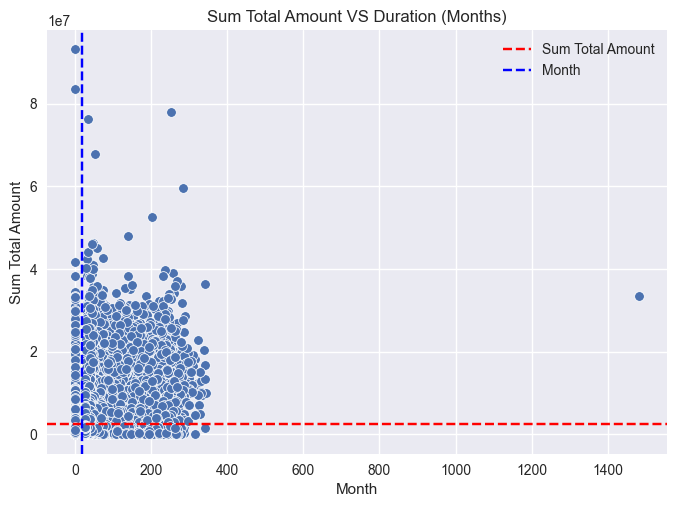

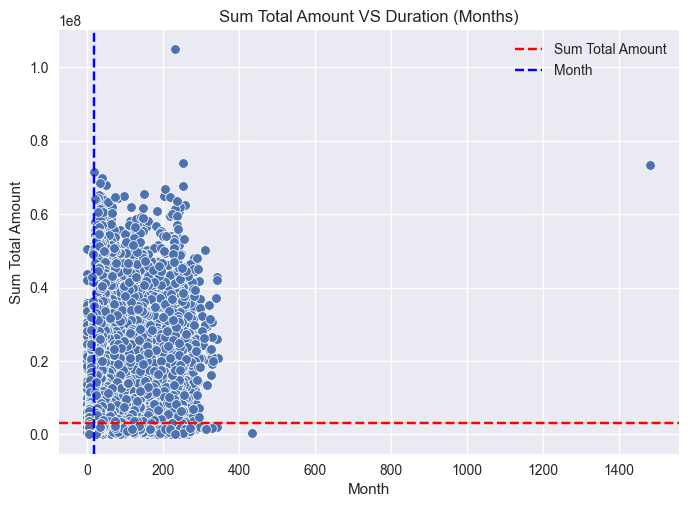

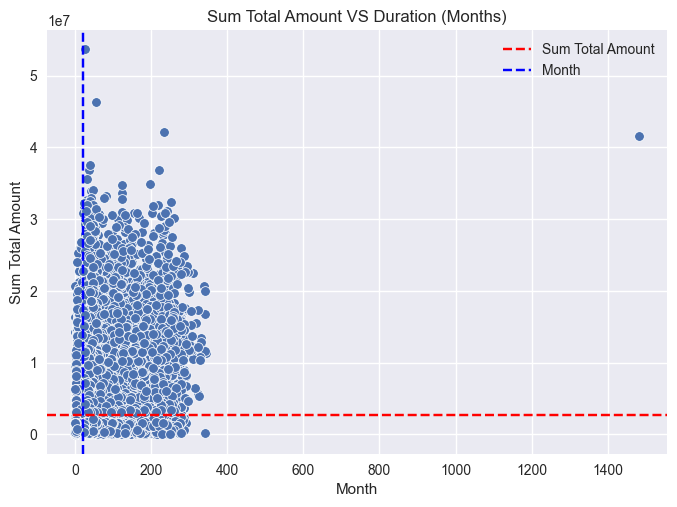

In [11]:
amountvsyr(df_21)
amountvsyr(df_22)
amountvsyr(df_23)

In [13]:
df_21 = df_21.reset_index(drop = True) 
df_22 = df_22.reset_index(drop = True) 
df_23 = df_23.reset_index(drop = True) 


# STEP 2
- Prepare DATA
- Selecting clustering samples.

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# decision tree for feature importance on a regression problem
from sklearn.tree import DecisionTreeClassifier

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

In [15]:
# Prepare data for an Elbow Visualization & Clustering

def PCAData(df):

    dfk = df.drop(columns=['ent']).reset_index(drop=True)
    
    bfc = Pipeline(
        steps=[("normalization", MinMaxScaler()),
            ('PCA',PCA(n_components=2, random_state=42))
            ])

    dfk = bfc.fit_transform(dfk)
    dfk = pd.DataFrame(dfk)

    return dfk

In [16]:
dfk21 = PCAData(df_21)
dfk22 = PCAData(df_22)
dfk23 = PCAData(df_23)

BIC Score ( To find the best cluster by using GaussianMixture)

In [17]:
def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)

def bicscore(X):
    param_grid = {
        "n_components": range(1, 7),
        "covariance_type": ["spherical", "tied", "diag", "full"] 
        }
    grid_search = GridSearchCV(
        GaussianMixture(), param_grid=param_grid, scoring=gmm_bic_score)

    grid_search.fit(X)

    df = pd.DataFrame(grid_search.cv_results_)[
        ["param_n_components", "param_covariance_type", "mean_test_score"]
    ]
    df["mean_test_score"] = -df["mean_test_score"]
    df = df.rename(
        columns={
            "param_n_components": "Number of components",
            "param_covariance_type": "Type of covariance",
            "mean_test_score": "BIC score",
        }
    )
    return df.sort_values(by="BIC score").head()

In [18]:
bicscore(dfk21)

,Number of components,Type of covariance,BIC score
23,6,full,42192.056622
21,4,full,50793.777945
22,5,full,52113.348744
16,5,diag,66657.854961
17,6,diag,69018.548857


In [19]:
bicscore(dfk22)

,Number of components,Type of covariance,BIC score
23,6,full,22751.211936
22,5,full,24106.775364
21,4,full,27193.238107
20,3,full,27400.817943
17,6,diag,27719.930344


In [20]:
bicscore(dfk23)

,Number of components,Type of covariance,BIC score
23,6,full,6120.263988
22,5,full,8409.013246
20,3,full,8489.384774
21,4,full,8512.150838
17,6,diag,23612.383411


K-Elbow Method

In [21]:
# km = KMeans(n_init='auto')

# visualizer = KElbowVisualizer(km, k=(2,10))

# visualizer.fit(dfk21)
# visualizer.show() 

In [22]:
# visualizer = KElbowVisualizer(km, k=(2,10))
# visualizer.fit(dfk22)
# visualizer.show()

In [23]:
# visualizer = KElbowVisualizer(km, k=(2,10))
# visualizer.fit(dfk23)
# visualizer.show()

Silhouette Method

In [24]:
# model = KMeans(5, random_state=42)
# visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

# visualizer.fit(dfk21)        # Fit the data to the visualizer
# visualizer.show() 

In [25]:
raise Exception

Exception: 

# RESULTS

- Gaussian Mixture

In [26]:
cl = GaussianMixture(n_components=6, random_state=142)

df_21['cluster'] = cl.fit(dfk21).predict(dfk21)
df_21

,ent,mem_duration(months),total_amount,total_Q1,total_Q2,total_Q3,total_Q4,total_online,total_online_Q1,total_online_Q2,...,sku_penetrate(%)_Q1,sku_penetrate(%)_Q2,sku_penetrate(%)_Q3,sku_penetrate(%)_Q4,ticket_size,ticket_size_Q1,ticket_size_Q2,ticket_size_Q3,ticket_size_Q4,cluster
0,TCC43RQQZ3B,0.0,2037000.0,2037000.0,0.0,0.0,0.0,1627000.0,1627000.0,0.0,...,0.533,0.000,0,0,679000.000,679000.0,0.000,0.0,0.0,5
1,TCC4Q4JZ4Q0,0.0,795500.0,795500.0,0.0,0.0,0.0,793000.0,793000.0,0.0,...,0.710,0.000,0,0,159100.000,159100.0,0.000,0.0,0.0,1
2,TCC434QRCJY,0.0,341000.0,341000.0,0.0,0.0,0.0,341000.0,341000.0,0.0,...,0.178,0.000,0,0,341000.000,341000.0,0.000,0.0,0.0,4
3,TCC43RRCE10,0.0,189000.0,189000.0,0.0,0.0,0.0,189000.0,189000.0,0.0,...,0.178,0.000,0,0,189000.000,189000.0,0.000,0.0,0.0,4
4,TCC4Q4ZC3JU,34.0,1655000.0,1320000.0,335000.0,0.0,0.0,1145000.0,810000.0,335000.0,...,0.533,0.178,0,0,275833.333,264000.0,335000.000,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277860,TCCECQQ1440,25.0,1729000.0,0.0,1729000.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.355,0,0,576333.333,0.0,576333.333,0.0,0.0,0
277861,TCCECQQ14EU,25.0,1565000.0,0.0,1565000.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.178,0,0,1565000.000,0.0,1565000.000,0.0,0.0,4
277862,TCCECWRQJW5,25.0,1949000.0,0.0,1949000.0,0.0,0.0,1949000.0,0.0,1949000.0,...,0.000,0.533,0,0,389800.000,0.0,389800.000,0.0,0.0,0
277863,TCCECQQ143K,25.0,1729000.0,0.0,1729000.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.355,0,0,576333.333,0.0,576333.333,0.0,0.0,0


In [27]:
cl = GaussianMixture(n_components=6, random_state=122)

df_22['cluster'] = cl.fit(dfk22).predict(dfk22)
df_22

,ent,mem_duration(months),total_amount,total_Q1,total_Q2,total_Q3,total_Q4,total_online,total_online_Q1,total_online_Q2,...,sku_penetrate(%)_Q1,sku_penetrate(%)_Q2,sku_penetrate(%)_Q3,sku_penetrate(%)_Q4,ticket_size,ticket_size_Q1,ticket_size_Q2,ticket_size_Q3,ticket_size_Q4,cluster
0,TCC4QW4134Y,0.0,488000.0,488000.0,0.0,0.0,0.0,488000.0,488000.0,0.0,...,0.355,0.000,0.0,0.0,244000.000,244000.000,0.000,0.0,0.0,4
1,TCCE4JE3W35,24.0,525000.0,525000.0,0.0,0.0,0.0,525000.0,525000.0,0.0,...,0.533,0.000,0.0,0.0,105000.000,105000.000,0.000,0.0,0.0,5
2,TCC433JWJ4I,25.0,234000.0,234000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.178,0.000,0.0,0.0,39000.000,39000.000,0.000,0.0,0.0,4
3,TCCE4JW3EC0,24.0,1795000.0,1795000.0,0.0,0.0,0.0,1795000.0,1795000.0,0.0,...,0.710,0.000,0.0,0.0,199444.444,199444.444,0.000,0.0,0.0,5
4,TCC4R4EWZEB,39.0,2442000.0,2442000.0,0.0,0.0,0.0,1729000.0,1729000.0,0.0,...,1.066,0.000,0.0,0.0,305250.000,305250.000,0.000,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115691,TCCEJCQ1RJU,13.0,1587000.0,0.0,1587000.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.888,0.0,0.0,264500.000,0.000,264500.000,0.0,0.0,1
115692,TCCEE11WE35,0.0,995000.0,0.0,995000.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.355,0.0,0.0,331666.667,0.000,331666.667,0.0,0.0,3
115693,TCCEJCC3CQF,13.0,1876000.0,0.0,1876000.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.888,0.0,0.0,312666.667,0.000,312666.667,0.0,0.0,1
115694,TCCEJC34RQ2,12.0,2023000.0,0.0,2023000.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.710,0.0,0.0,404600.000,0.000,404600.000,0.0,0.0,1


In [28]:
cl = GaussianMixture(n_components=6, random_state=122)

df_23['cluster'] = cl.fit(dfk23).predict(dfk23)
df_23

,ent,mem_duration(months),total_amount,total_Q1,total_Q2,total_Q3,total_Q4,total_online,total_online_Q1,total_online_Q2,...,sku_penetrate(%)_Q1,sku_penetrate(%)_Q2,sku_penetrate(%)_Q3,sku_penetrate(%)_Q4,ticket_size,ticket_size_Q1,ticket_size_Q2,ticket_size_Q3,ticket_size_Q4,cluster
0,TCC4QCZJZQI,35.0,2945000.0,590000.0,2355000.0,0.0,0.0,2945000.0,590000.0,2355000.0,...,0.355,0.355,0.0,0,327222.222,295000.000,336428.571,0.0,0.0,5
1,TCC4Q4JJ3Q0,35.0,2466000.0,2014000.0,452000.0,0.0,0.0,2466000.0,2014000.0,452000.0,...,0.710,0.355,0.0,0,274000.000,402800.000,113000.000,0.0,0.0,2
2,TCCEJ3444WF,7.0,991000.0,991000.0,0.0,0.0,0.0,991000.0,991000.0,0.0,...,0.888,0.000,0.0,0,165166.667,165166.667,0.000,0.0,0.0,0
3,TCCE4ERZR40,24.0,4624000.0,3027000.0,1597000.0,0.0,0.0,4624000.0,3027000.0,1597000.0,...,1.066,0.888,0.0,0,231200.000,336333.333,145181.818,0.0,0.0,2
4,TCCEJWQ3REP,7.0,585000.0,585000.0,0.0,0.0,0.0,585000.0,585000.0,0.0,...,0.178,0.000,0.0,0,585000.000,585000.000,0.000,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78925,TCCEJCJQERF,1.0,50000.0,0.0,50000.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.178,0.0,0,50000.000,0.000,50000.000,0.0,0.0,3
78926,TCCE44EEQ1I,1.0,50000.0,0.0,50000.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.178,0.0,0,50000.000,0.000,50000.000,0.0,0.0,3
78927,TCCEERRJJZ7,1.0,50000.0,0.0,50000.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.178,0.0,0,50000.000,0.000,50000.000,0.0,0.0,3
78928,TCCE1JQR14F,21.0,5000.0,0.0,5000.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.178,0.0,0,2500.000,0.000,2500.000,0.0,0.0,3


- KMeans

In [ ]:
# cl = KMeans(n_clusters=4, n_init = 'auto', random_state=0)

# df_21['cluster'] = cl.fit(dfk21).labels_
# df_21

In [ ]:
# cl = KMeans(n_clusters=4, n_init = 'auto', random_state=0)

# df_22['cluster'] = cl.fit(dfk22).labels_
# df_22

In [ ]:
# cl = KMeans(n_clusters=4, n_init = 'auto', random_state=0)

# df_23['cluster'] = cl.fit(dfk23).labels_
# df_23

- Feature Importance

In [29]:
def FeatureIm(df):
    global X
    # define dataset
    X = df.drop(columns=['ent','cluster'])
    y = df['cluster']

    # define the model
    model = DecisionTreeClassifier()
    # fit the model
    model.fit(X, y)
    # get importance
    importance = model.feature_importances_

    # summarize feature importance
    tup = []
    tups = {}
    for i,v in enumerate(importance):
        if v > sum(importance)/len(importance) :
            tup.append('Score: %.5f , Feature: %0d' % (v,i))
    tup.sort(reverse=True)
    print(tup[0],tup[1],sep='\n')
    
    # plot feature importance
    plt.style.use('seaborn-v0_8')
    plt.bar([x for x in range(len(importance))], importance)
    plt.suptitle("Feature importance")
    plt.show()

# Getting unique labels
 
def ClusterPlot(df , dfk):
    dfk['cluster'] = df['cluster']
    
    # plotting the results:
    
    plt.style.use('seaborn-v0_8')

    fig, axe = plt.subplots(figsize=(8,6))

    color_dict = dict({0:'#D2B48C', 1:'#B0E0E6',
                    2: '#7B68EE',3: '#1E90FF',4: '#9FE2BF',5: '#FFDEAD'})

    g = sns.scatterplot(data = dfk , x=0, y=1, hue="cluster", ax=axe ,alpha=0.6, palette=color_dict)
    axe.set(xlabel='X', ylabel='Y')
    fig.suptitle("GaussianMixture Clustering results")
    plt.show()

PLOT (KMeans)

Score: 0.34528 , Feature: 27
Score: 0.27341 , Feature: 26


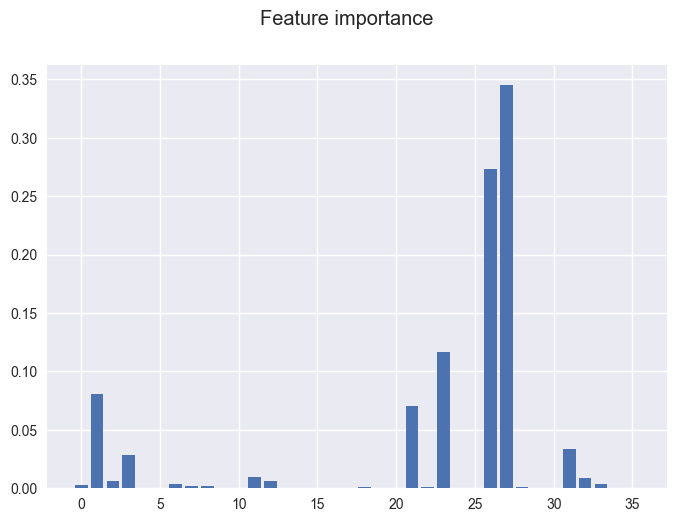

In [30]:
FeatureIm(df_21)

In [31]:
print(f"Feature Importance : {X.columns[27]} , {X.columns[26]}")

Feature Importance : sku_penetrate(%)_Q1 , sku_penetrate(%)


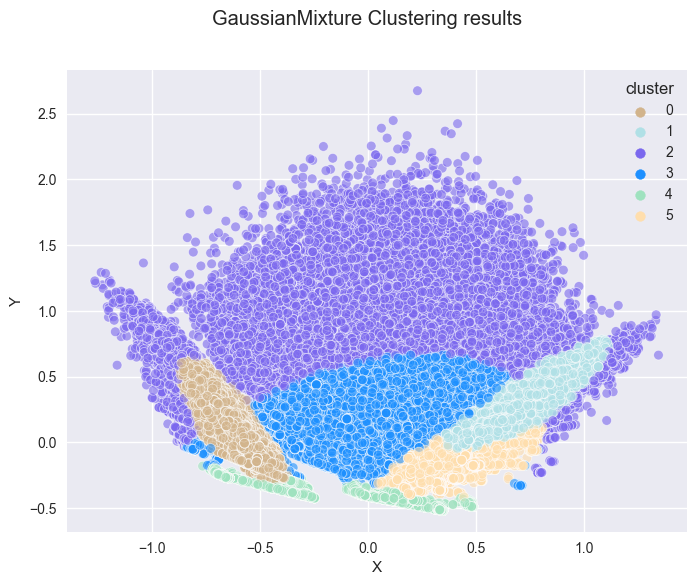

In [32]:
ClusterPlot(df_21 , dfk21)

Score: 0.32500 , Feature: 27
Score: 0.18826 , Feature: 1


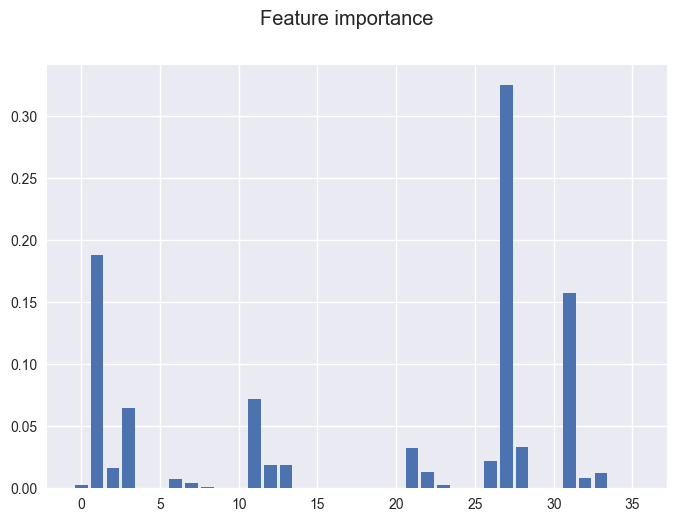

In [33]:
FeatureIm(df_22)

In [34]:
print(f"Feature Importance : {X.columns[27]} , {X.columns[1]}")

Feature Importance : sku_penetrate(%)_Q1 , total_amount


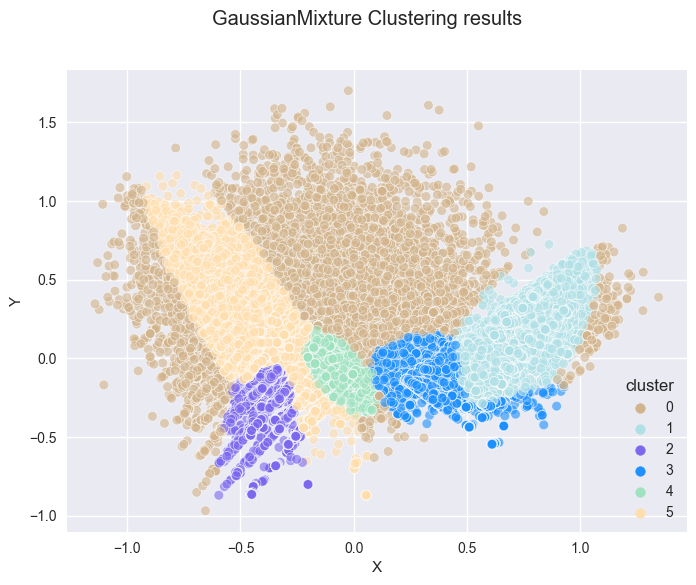

In [35]:
ClusterPlot(df_22 , dfk22)

Score: 0.28301 , Feature: 23
Score: 0.17434 , Feature: 22


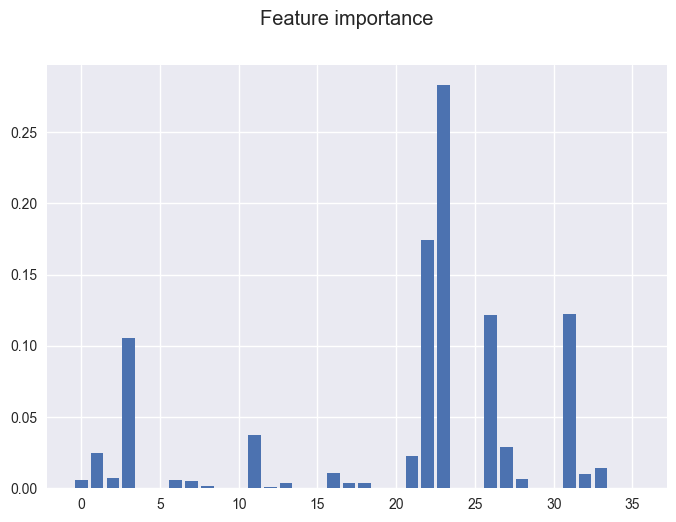

In [36]:
FeatureIm(df_23)

In [37]:
print(f"Feature Importance : {X.columns[23]} , {X.columns[22]}")

Feature Importance : transaction_Q2 , transaction_Q1


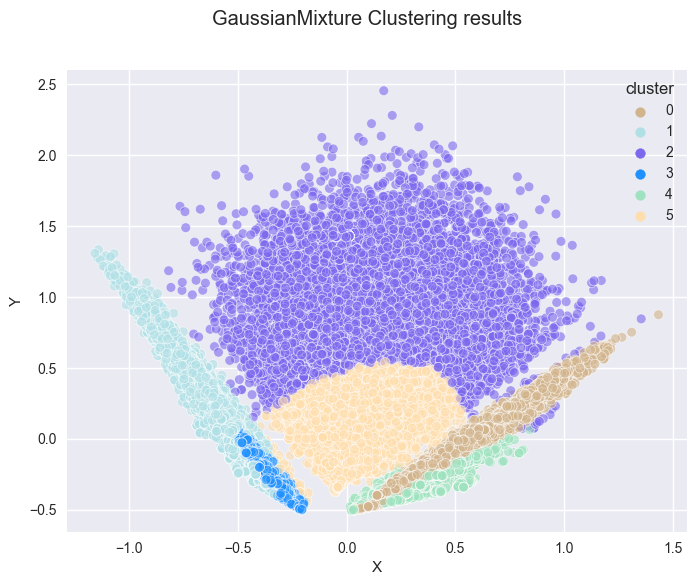

In [38]:
ClusterPlot(df_23 , dfk23)

# Export

- Prepare DATA

In [39]:
df = pd.DataFrame(o_df['ent'].unique()).rename(columns={0:'ent'})

df = pd.merge(df, df_21.loc[:,['ent','cluster']] ,how='left' , left_on=['ent'], right_on=['ent']
              ).rename(columns={'cluster':'cluster_2021'})
df = pd.merge(df, df_22.loc[:,['ent','cluster']] ,how='left' , left_on=['ent'], right_on=['ent']
              ).rename(columns={'cluster':'cluster_2022'})
df = pd.merge(df, df_23.loc[:,['ent','cluster']] ,how='left' , left_on=['ent'], right_on=['ent']
              ).rename(columns={'cluster':'cluster_2023'})

# df = df.fillna('Loss')
df

,ent,cluster_2021,cluster_2022,cluster_2023
0,TCC43RQQZ3B,5.0,NaN,NaN
1,TCC4Q4JZ4Q0,1.0,NaN,NaN
2,TCC4RJ11QE7,NaN,NaN,5.0
3,TCC434QRCJY,4.0,NaN,NaN
4,TCC43RRCE10,4.0,NaN,NaN
...,...,...,...,...
580819,TCCEQ1Z1QC7,NaN,NaN,NaN
580820,TCCEQ1Z1QEF,NaN,NaN,NaN
580821,TCCEQ1Z1QW0,NaN,NaN,NaN
580822,TCCEQ1Q1CE7,NaN,NaN,NaN


In [40]:
df[df[['cluster_2021', 'cluster_2022', 'cluster_2023']].notnull().all(1)]

,ent,cluster_2021,cluster_2022,cluster_2023
153,TCC4RCJ31CY,3.0,0.0,3.0
722,TCC4JQ3JE47,2.0,0.0,3.0
1073,TCC4Q4Z143Y,3.0,3.0,3.0
1551,TCC4JQJ1RJK,2.0,0.0,0.0
2671,TCC4QZ33CJ7,2.0,0.0,0.0
...,...,...,...,...
324471,TCC41JWQCW7,0.0,1.0,3.0
324845,TCCECW1JRQ5,0.0,4.0,3.0
324959,TCCECQQ1Z1I,0.0,5.0,3.0
325285,TCCEC133RZI,0.0,0.0,3.0


In [94]:
dfoff = df.fillna(6)

dfoff

,ent,cluster_2021,cluster_2022,cluster_2023
0,TCC43RQQZ3B,5.0,6.0,6.0
1,TCC4Q4JZ4Q0,1.0,6.0,6.0
2,TCC4RJ11QE7,6.0,6.0,5.0
3,TCC434QRCJY,4.0,6.0,6.0
4,TCC43RRCE10,4.0,6.0,6.0
...,...,...,...,...
580819,TCCEQ1Z1QC7,6.0,6.0,6.0
580820,TCCEQ1Z1QEF,6.0,6.0,6.0
580821,TCCEQ1Z1QW0,6.0,6.0,6.0
580822,TCCEQ1Q1CE7,6.0,6.0,6.0


- DATA Generator

In [95]:
sankey_source = []
sankey_target = []
for i  in range(7):
    for j in range(7):
        sankey_source.append(i)
        sankey_target.append(j+7)

for i  in range(7):
    for j in range(7):
        sankey_source.append(i+7)
        sankey_target.append(j+14)

# sankey values

c = 0
vals = []
for c,n,i in zip(range(len(sankey_source)),sankey_source,sankey_target):
    if c < 49 :
        d = dfoff.loc[(dfoff['cluster_2021'] == n) & (dfoff['cluster_2022'] == i-7)]
        vals.append(len(d))
    else :
        d = dfoff.loc[(dfoff['cluster_2022'] == n-7) & (dfoff['cluster_2023'] == i-14)]
        vals.append(len(d))

In [96]:
print(len(sankey_source),len(sankey_target),len(vals))

98 98 98


In [99]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["2021-C1", "2021-C2", "2021-C3", "2021-C4", "2021-C5", "2021-C6","LOSS",
               "2022-C1", "2022-C2", "2022-C3", "2022-C4", "2022-C5", "2022-C6","LOSS",
               "2023-C1", "2023-C2", "2023-C3", "2023-C4", "2023-C5", "2023-C6","LOSS",
               ],
      color = "yellowgreen"
    ),
    link = dict(
      source = sankey_source, # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = sankey_target,
      value = vals
  ))])

fig.update_layout(title_text="Sankey Diagram by Cluster", font_size=10)
fig.show()